# Cardio Risk Machine Learning Prediction Model


More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** 
* **Model training** 
* **Model evaluation** 
* **Model comparison** 
* **Model fine-tuning** 
* **Feature importance** 
* **Cross-validation** 
* **Reporting** 


### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.


## Preparing the tools

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv") # 'DataFrame' shortened to 'df'
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since these two values are close to even, our `target` column can be considered **balanced**.

In [5]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

`df.info()` and `df.describe()` show a quick insight to the number of missing values you have and what type of data your working with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Making a visual crosstab (target and sex)

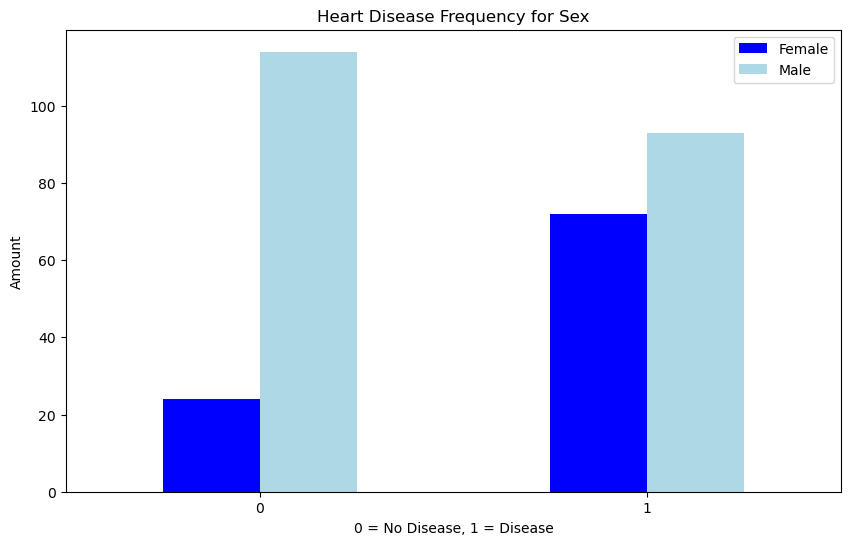

In [8]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["blue", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart rate for Heart Disease

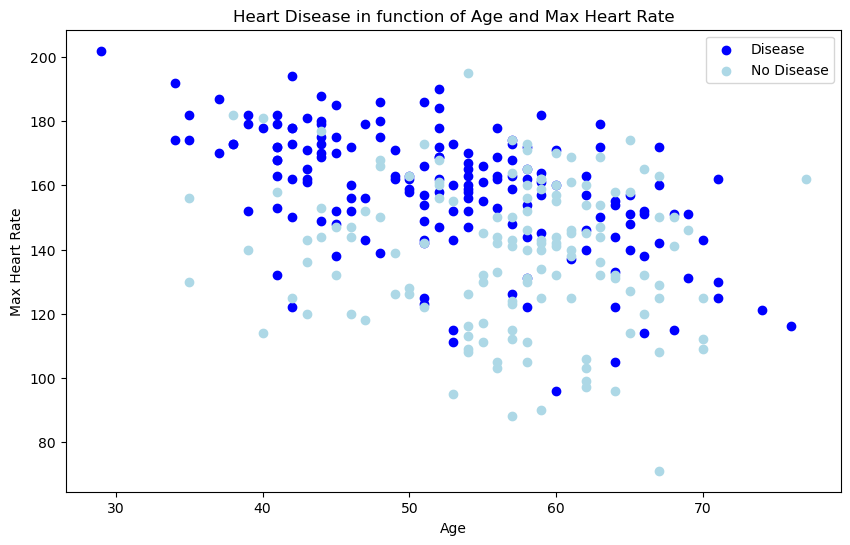

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="blue")

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Age distribution

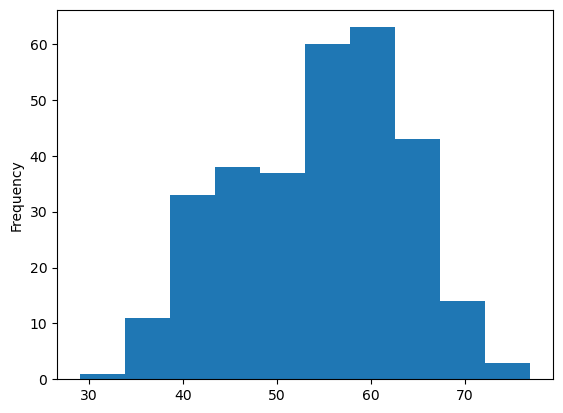

In [10]:
df.age.plot.hist();

### Correlation between independent variables

In [11]:
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


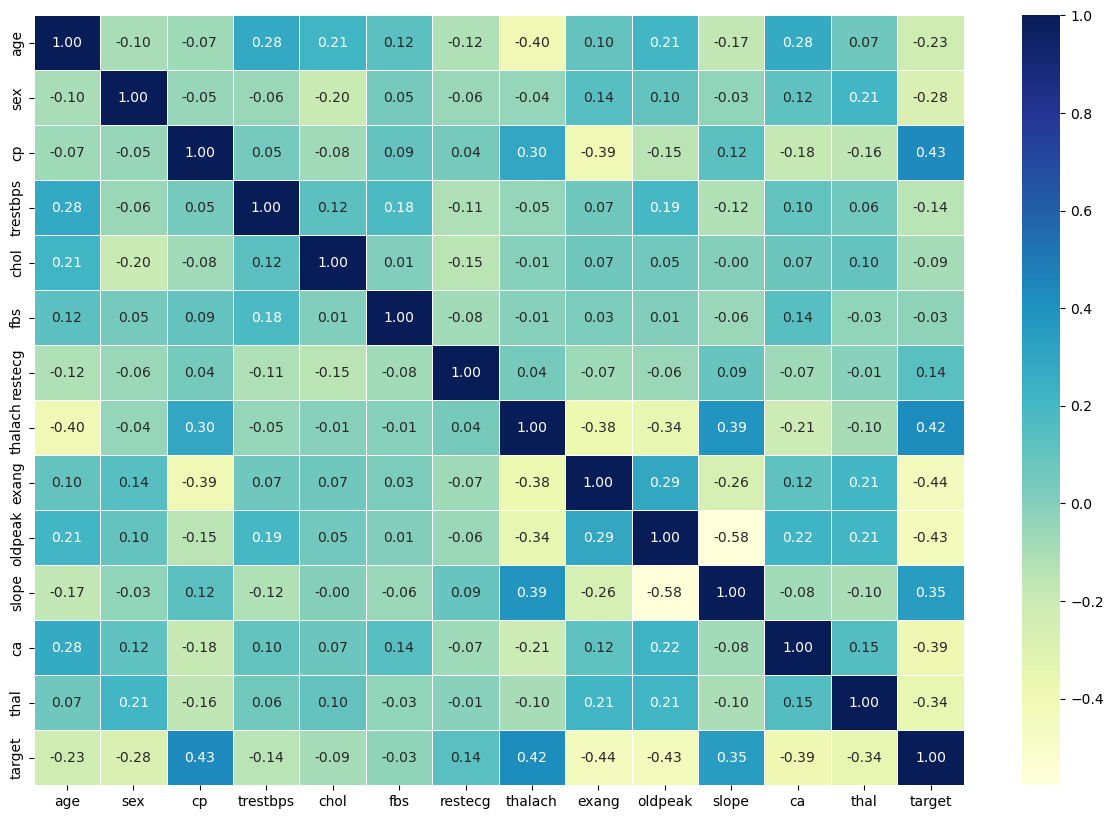

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### spliting the target values from the rest 

In [14]:
X = df.drop("target", axis=1)
y = df.target.values

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and test split

In [17]:
# Random seed for reproducibility
np.random.seed(99)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set


In [18]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [19]:
y_train, len(y_train)

(array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       dtype=int64),
 242)

Okay, now we are using 242 samples to train on

## Models

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`
4. Support Vector Machine - `SVC()`
5. Naive Bayes - `GaussianNB()`
6. XGBoost - `XGBClassifier()`
7. LightGBM - `LGBMClassifier()`
8. CatBoost - `CatBoostClassifier()`

In [20]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Support Vector Machine":SVC(),
          "Naive Bayes ":GaussianNB(),
          "XGBoost":XGBClassifier(
                  max_depth=6,
                  learning_rate=0.1,
                  n_estimators=50,
                  subsample=0.8,
                  colsample_bytree=0.8,
                  min_child_weight=1
          ),
          "LightGBM":LGBMClassifier(
                  num_leaves=31,
                  learning_rate=0.05,
                  n_estimators=100,
                  max_depth=-1,
                  min_data_in_leaf=20,
                  feature_fraction=0.9,
                  bagging_fraction=0.8
          ),
          "CatBoost":CatBoostClassifier(
              iterations=500,
              learning_rate=0.03,
              depth=6,
              l2_leaf_reg=3,
              random_strength=1,
              bagging_temperature=1
          )
         }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(99)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\ASUS\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 127, number of negative: 115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.819672131147541,
 'Random Forest': 0.8524590163934426,
 'Support Vector Machine': 0.6721311475409836,
 'Naive Bayes ': 0.9016393442622951,
 'XGBoost': 0.8360655737704918,
 'LightGBM': 0.8524590163934426,
 'CatBoost': 0.819672131147541}

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

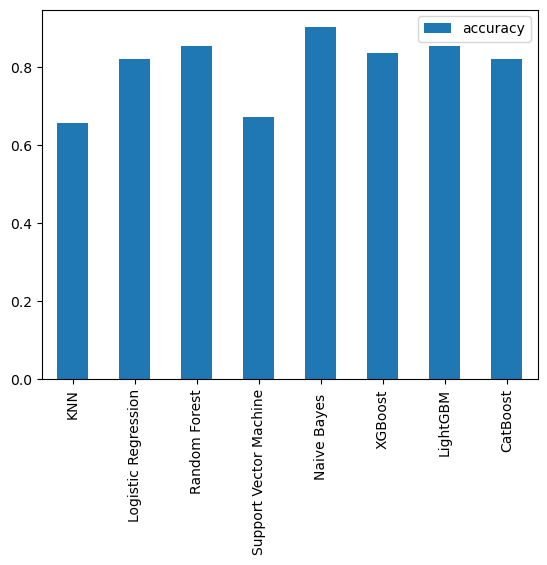

In [22]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning and cross-validation

Since we found out which model works the best with our dataset now we can choose top 3
1. Naive Bayes
2. Random Forest
3. LightGBM

### Tuning models with with `RandomizedSearchCV`

In [23]:
# Different GaussianNB hyperparameters
gnb_grid = {
    "var_smoothing": np.logspace(-9, 0, 10),
    "priors": [None, [0.5, 0.5], [0.3, 0.7]]
}


# Different RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2]
    
}

# Different LGBMClassifier hyperparameters
lgbm_grid = {
    "num_leaves": np.arange(20, 150, 10),
    "learning_rate": np.logspace(-4, 0, 20),
    "n_estimators": np.arange(50, 1000, 50),
    "max_depth": [-1, 3, 5, 10],
    "min_child_samples": np.arange(5, 50, 5),
    "subsample": np.linspace(0.5, 1.0, 6),
    "colsample_bytree": np.linspace(0.5, 1.0, 6),
    "reg_alpha": np.logspace(-4, 1, 10),
    "reg_lambda": np.logspace(-4, 1, 10),
    "min_split_gain": [0.0, 0.1, 0.2]
}


In [24]:
# Setup random seed
np.random.seed(99)

# Setup random hyperparameter search for GaussianNB
rs_gnb = RandomizedSearchCV(GaussianNB(),
                        param_distributions=gnb_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fit random hyperparameter search model
rs_gnb.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [25]:
rs_gnb.best_params_

{'var_smoothing': 1e-05, 'priors': [0.3, 0.7]}

In [26]:
rs_gnb.score(X_test, y_test)

0.9016393442622951

In [30]:
# Setup random seed
np.random.seed(99)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

In [32]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Setup random seed
np.random.seed(99)

# Setup random hyperparameter search for RandomForestClassifier
rs_lgbm = RandomizedSearchCV(LGBMClassifier(),
                        param_distributions=lgbm_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fit random hyperparameter search model
rs_lgbm.fit(X_train, y_train);

In [34]:
rs_lgbm.best_params_

{'subsample': 0.9,
 'reg_lambda': 0.00035938136638046257,
 'reg_alpha': 0.7742636826811278,
 'num_leaves': 140,
 'n_estimators': 800,
 'min_split_gain': 0.0,
 'min_child_samples': 30,
 'max_depth': 3,
 'learning_rate': 0.03359818286283781,
 'colsample_bytree': 0.8}

In [35]:
rs_lgbm.score(X_test, y_test)

0.8524590163934426

### Tuning a model with `GridSearchCV`

In [36]:
# Setup random seed
np.random.seed(99)

# Setup random hyperparameter search for GaussianNB
gs_gnb = GridSearchCV(GaussianNB(),
                        param_grid=gnb_grid,
                        cv=5,
                        verbose=True)

# Fit random hyperparameter search model
gs_gnb.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_gnb.best_params_

{'priors': [0.3, 0.7], 'var_smoothing': 1e-05}

In [38]:
gs_gnb.score(X_test, y_test)

0.9016393442622951

#### “Given the lack of improvement observed with GaussianNB, it is likely that other algorithms will yield similar results. Therefore, GaussianNB has been selected as the algorithm for this dataset.”

## Evaluating the GaussianNB model

* ROC curve and AUC score - `RocCurveDisplay()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`


In [39]:
y_preds = gs_gnb.predict(X_test)

In [40]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [41]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

### ROC Curve and AUC Scores

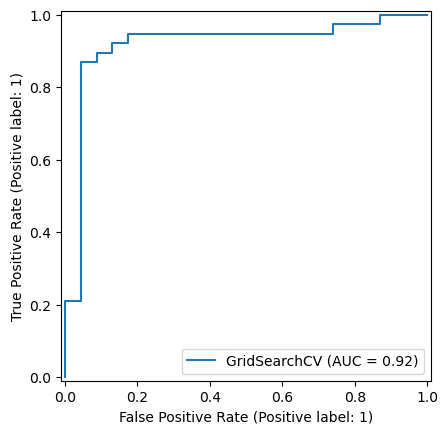

In [42]:
RocCurveDisplay.from_estimator(estimator=gs_gnb, 
                               X=X_test, 
                               y=y_test); 

### Confusion matrix 

In [44]:
print(confusion_matrix(y_test, y_preds))

[[20  3]
 [ 3 35]]


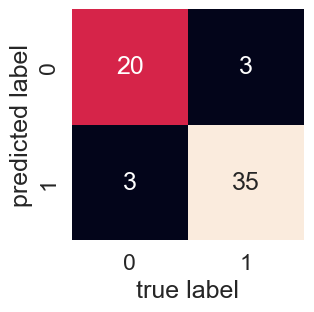

In [45]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.92      0.92      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### `cross_val_score()`

In [47]:
gs_gnb.best_params_

{'priors': [0.3, 0.7], 'var_smoothing': 1e-05}

In [49]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-05)

In [50]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.85      , 0.7       ])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8214754098360656

In [53]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8137717837717838

In [54]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8787878787878787

In [55]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8444354026195459

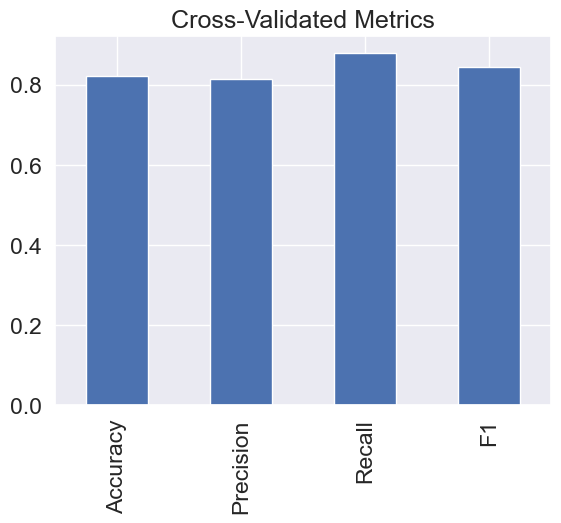

In [56]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

In [57]:
clf.fit(X_train, y_train);

In [59]:
# Check coef_
clf.coefs_

AttributeError: 'GaussianNB' object has no attribute 'coefs_'

**The GaussianNB does not offer an intrinsic method to evaluate feature importances. Naive Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability. Thus, there are no coefficients computed or associated with the features you used to train the model.**

## Conclusion
In this project, we successfully trained a model using the **Gaussian Naive Bayes (GaussianNB)** algorithm. After evaluating various algorithms, GaussianNB was selected due to its performance and suitability for the dataset. The model was trained with specific priors and variance smoothing parameters, which were carefully chosen to optimize its performance.

The results demonstrate the effectiveness of GaussianNB in handling the given dataset, achieving an impressive accuracy of **90%**. This high level of accuracy highlights the model’s capability to provide valuable insights and accurate predictions. Future work could involve exploring other algorithms or fine-tuning the current model to further enhance its performance.